In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.describe(include = ['object'])

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [5]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [6]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
df['satisfaction_level'].value_counts().head(10)

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
0.73    246
0.37    241
0.78    241
0.82    241
0.89    237
Name: satisfaction_level, dtype: int64

In [8]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [9]:
df['average_montly_hours'].value_counts().head()

156    153
135    153
149    148
151    147
160    136
Name: average_montly_hours, dtype: int64

In [10]:
df['time_spend_company'].value_counts().head()
#df['time_spend_company'].value_counts().head().plot()


3    6443
2    3244
4    2557
5    1473
6     718
Name: time_spend_company, dtype: int64

In [11]:
df['Work_accident'].value_counts().head()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [12]:
df['promotion_last_5years'].value_counts().head()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [13]:
df['last_evaluation'].value_counts().head()

0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
Name: last_evaluation, dtype: int64

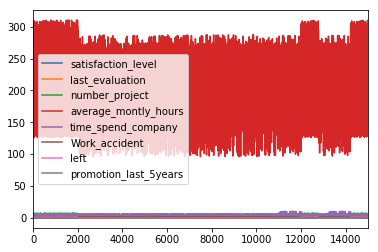

In [14]:
df.plot()

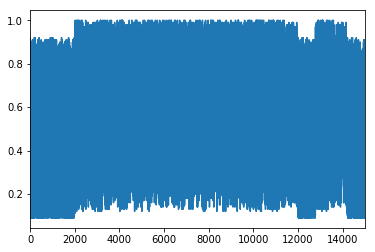

In [15]:
df['satisfaction_level'].plot()

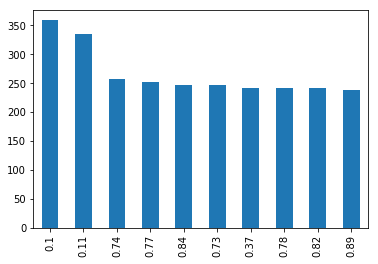

In [16]:
df['satisfaction_level'].value_counts().head(10).plot(kind='bar')


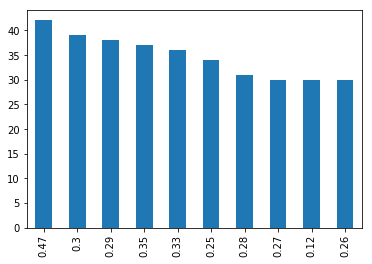

In [17]:
df['satisfaction_level'].value_counts().tail(10).plot(kind='bar')

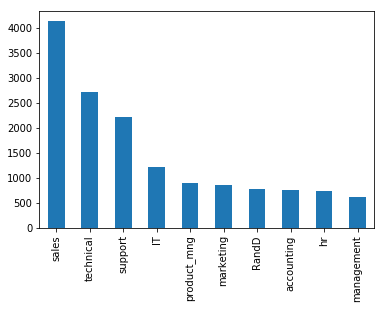

In [18]:
#so there are more people who are either properly satisfied or not at all satisfied
#there are very few people who are moderatly satisfied
df['sales'].value_counts().head(20).plot(kind='bar')

In [19]:
df['satisfaction_level'].unique()

array([ 0.38,  0.8 ,  0.11,  0.72,  0.37,  0.41,  0.1 ,  0.92,  0.89,
        0.42,  0.45,  0.84,  0.36,  0.78,  0.76,  0.09,  0.46,  0.4 ,
        0.82,  0.87,  0.57,  0.43,  0.13,  0.44,  0.39,  0.85,  0.81,
        0.9 ,  0.74,  0.79,  0.17,  0.24,  0.91,  0.71,  0.86,  0.14,
        0.75,  0.7 ,  0.31,  0.73,  0.83,  0.32,  0.54,  0.27,  0.77,
        0.88,  0.48,  0.19,  0.6 ,  0.12,  0.61,  0.33,  0.56,  0.47,
        0.28,  0.55,  0.53,  0.59,  0.66,  0.25,  0.34,  0.58,  0.51,
        0.35,  0.64,  0.5 ,  0.23,  0.15,  0.49,  0.3 ,  0.63,  0.21,
        0.62,  0.29,  0.2 ,  0.16,  0.65,  0.68,  0.67,  0.22,  0.26,
        0.99,  0.98,  1.  ,  0.52,  0.93,  0.97,  0.69,  0.94,  0.96,
        0.18,  0.95])

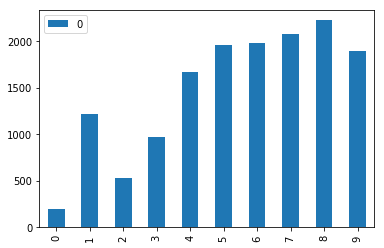

In [20]:
ratings = []
for i in range(10):
    rating = len(df.satisfaction_level[(df.satisfaction_level >= i*0.10) & (df.satisfaction_level < i*0.10+0.1)])
    ratings.append(rating)
new = pd.DataFrame(data = ratings) 
new.plot(kind = 'bar')


In [21]:
df.groupby('sales').satisfaction_level.mean()

sales
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64

In [22]:
df.groupby('left').satisfaction_level.mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [23]:
df.groupby('sales').left.mean()

sales
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64

In [24]:
#df.salary.isnull()
#se = ['low']
#df['salary'] = df.salary.isin(se).map(True = 1)
#mapping low =1
#medium = 2
#high = 3

df['salary'] = df['salary'].map({'low': 1, 'medium': 2, 'high' : 3})

In [25]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [26]:
df.rename(columns = {'sales' : 'department'}, inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [27]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [28]:
#change the department values
df['department'] = df['department'].map({'sales': 1, 'technical': 2, 'support' : 3,'IT': 4, 'product_mng': 5, 'marketing': 6, 'RandD': 7, 'accounting': 8, 'hr': 9,'management': 10})


In [29]:
df['department'].head()

0    1
1    1
2    1
3    1
4    1
Name: department, dtype: int64

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [31]:
df.groupby('number_project').left.mean()

number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64

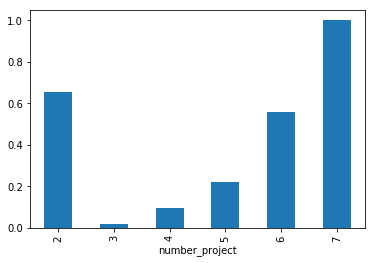

In [32]:
df.groupby('number_project').left.mean().plot(kind = 'bar')

In [33]:
df.groupby('left').number_project.mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

In [34]:
df[(df.left == 1) & (df.number_project == 7)].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2,0.11,0.88,7,272,4,0,1,0,1,2
43,0.10,0.80,7,281,4,0,1,0,2,1
54,0.10,0.92,7,307,4,0,1,0,3,1
56,0.11,0.94,7,255,4,0,1,0,3,1
61,0.11,0.93,7,308,4,0,1,0,4,2


In [35]:
df[(df.left != 1) & (df.number_project == 7)]
#Surprising there is no one who did 7 projects and not leaving


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [36]:
len(df[(df.number_project == 7)])

256

In [37]:
df.groupby('satisfaction_level').number_project.mean().head()

satisfaction_level
0.09    6.179487
0.10    6.209497
0.11    6.182090
0.12    4.300000
0.13    4.425926
Name: number_project, dtype: float64

In [38]:
df.groupby('number_project').satisfaction_level.mean()

number_project
2    0.478769
3    0.687670
4    0.695132
5    0.678888
6    0.273458
7    0.118711
Name: satisfaction_level, dtype: float64

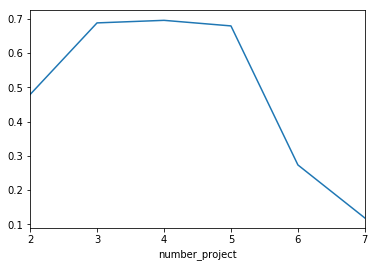

In [39]:
df.groupby('number_project').satisfaction_level.mean().plot()

In [40]:
#df.groupby('department').satisfaction_level.mean()
df.groupby('number_project').average_montly_hours.mean()


number_project
2    160.342546
3    197.507522
4    205.122108
5    212.061572
6    238.694208
7    276.078125
Name: average_montly_hours, dtype: float64

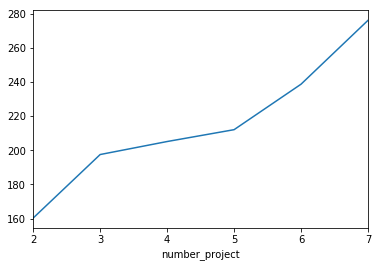

In [41]:
df.groupby('number_project').average_montly_hours.mean().plot()

In [42]:
df.groupby('department').number_project.mean()

department
1     3.776329
2     3.877941
3     3.803948
4     3.816626
5     3.807095
6     3.687646
7     3.853875
8     3.825293
9     3.654939
10    3.860317
Name: number_project, dtype: float64

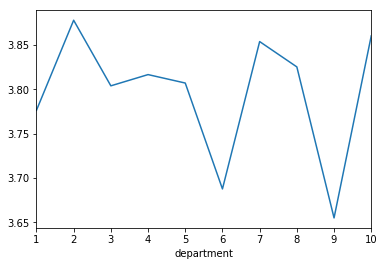

In [43]:
df.groupby('department').number_project.mean().plot()

In [44]:
df.groupby('last_evaluation').satisfaction_level.mean().head()

last_evaluation
0.36    0.529545
0.37    0.535818
0.38    0.517000
0.39    0.518077
0.40    0.553509
Name: satisfaction_level, dtype: float64

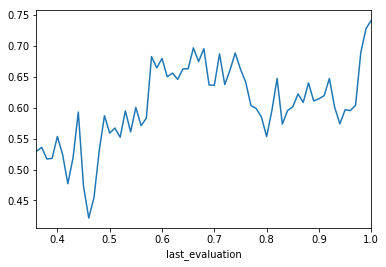

In [45]:
df.groupby('last_evaluation').satisfaction_level.mean().plot()

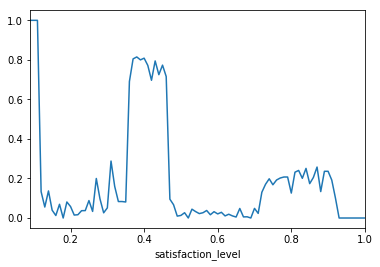

In [46]:
df.groupby('satisfaction_level').left.mean().plot()

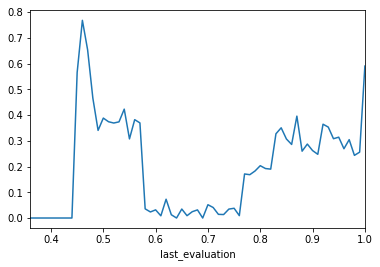

In [47]:
df.groupby('last_evaluation').left.mean().plot()

In [48]:
df.groupby('number_project').last_evaluation.mean()

number_project
2    0.568505
3    0.716572
4    0.740009
5    0.762010
6    0.786550
7    0.859609
Name: last_evaluation, dtype: float64

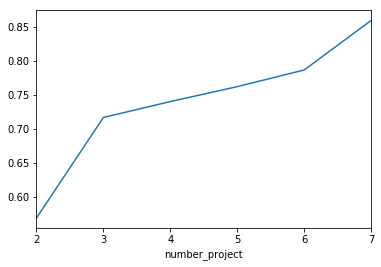

In [49]:
df.groupby('number_project').last_evaluation.mean().plot()

In [50]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,1,1


In [51]:
df.groupby('salary').left.mean()

salary
1    0.296884
2    0.204313
3    0.066289
Name: left, dtype: float64

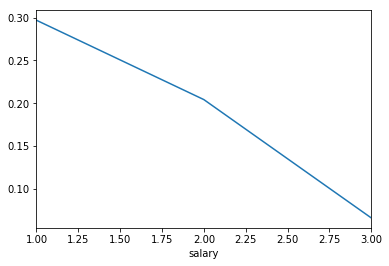

In [52]:
df.groupby('salary').left.mean().plot()

In [53]:
df.groupby('salary').number_project.mean()

salary
1    3.799891
2    3.813528
3    3.767179
Name: number_project, dtype: float64

In [54]:
df.groupby('number_project').salary.mean()

number_project
2    1.495812
3    1.658940
4    1.606186
5    1.611735
6    1.522998
7    1.449219
Name: salary, dtype: float64

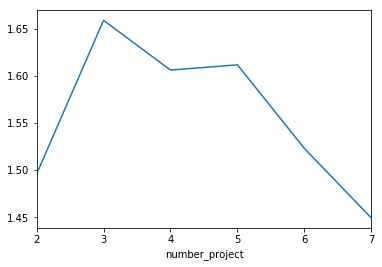

In [55]:
df.groupby('number_project').salary.mean().plot()

In [56]:
df.groupby('department').salary.mean()

department
1     1.557971
2     1.569485
3     1.549125
4     1.571312
5     1.575388
6     1.624709
7     1.602287
8     1.629726
9     1.607578
10    2.071429
Name: salary, dtype: float64

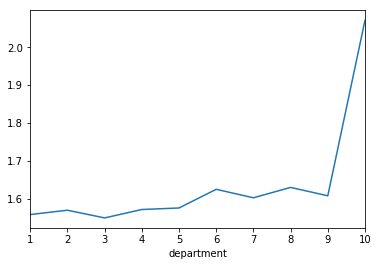

In [57]:
df.groupby('department').salary.mean().plot()

In [58]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [59]:
df.groupby('department').Work_accident.mean()

department
1     0.141787
2     0.140074
3     0.154778
4     0.133659
5     0.146341
6     0.160839
7     0.170267
8     0.125163
9     0.120433
10    0.163492
Name: Work_accident, dtype: float64

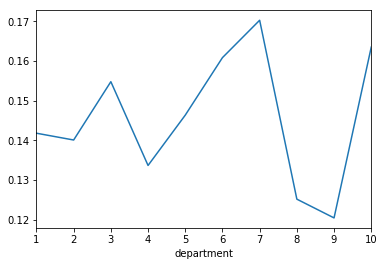

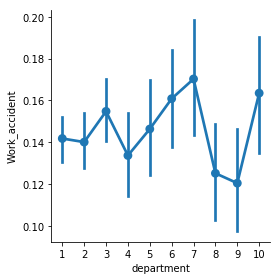

In [109]:
df.groupby('department').Work_accident.mean().plot()
sns.factorplot(x='department',y='Work_accident',data=df)

In [61]:
len(df[(df.left != 1) & (df.Work_accident == 1)])



2000

In [62]:
len(df[(df.left == 1) & (df.Work_accident == 1)])


169

In [63]:
df.groupby('left').Work_accident.mean()

left
0    0.175009
1    0.047326
Name: Work_accident, dtype: float64

In [64]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

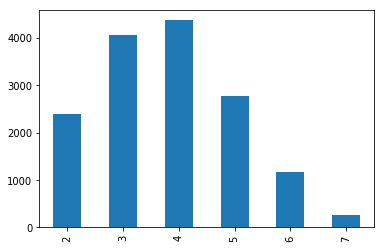

In [65]:
df['number_project'].value_counts(sort = False).plot(kind = 'bar')

In [66]:
len(df[(df.left == 1) & (df.number_project == 2)])
#df['number_project'].value_counts(sort = False).plot(kind = 'bar')


1567

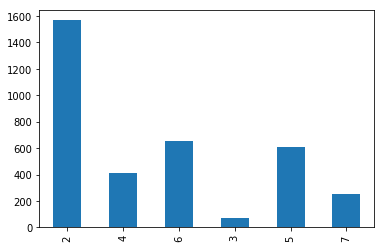

In [67]:
df0 = pd.DataFrame(data=df[df.left == 1])
#df0['funk'] = df[df.left == 1]
df0['number_project'].value_counts(sort = False, ascending = True).plot(kind = 'bar')


In [68]:
#df0.plot(kind = 'bar')
df0['number_project'].value_counts(sort = False, ascending = True)

2    1567
4     409
6     655
3      72
5     612
7     256
Name: number_project, dtype: int64

# Proper visulization

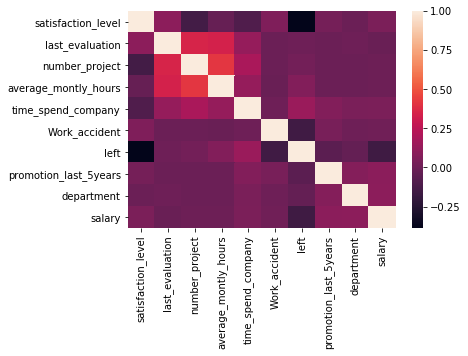

In [91]:
corr = df.corr()
sns.heatmap(corr)

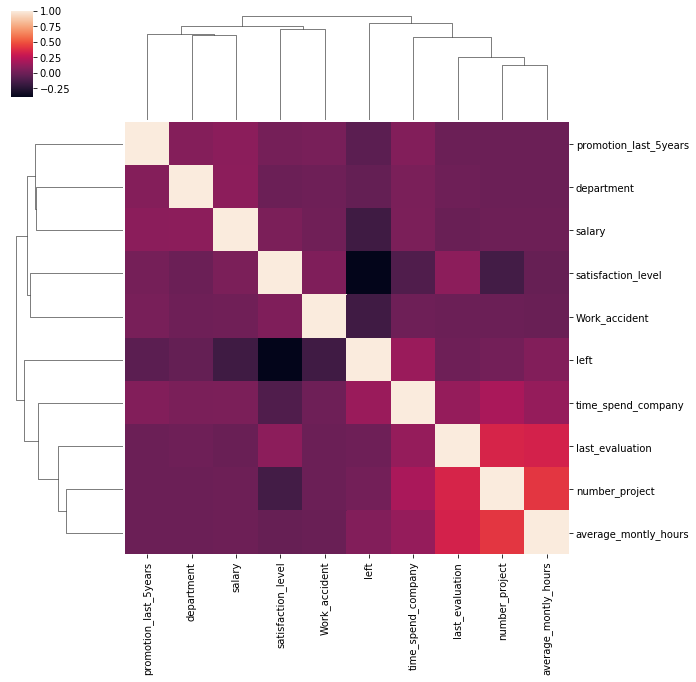

In [96]:
sns.clustermap(corr)

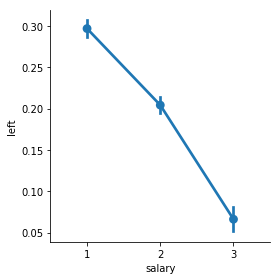

In [102]:
#According to above it is showing that salary, satisfaction level, work accident are most important
#we will see how salart and left is related
sns.factorplot(x='salary',y='left',data = df)

In [69]:
#principle component analysis
from sklearn.preprocessing import StandardScaler
features = ['satisfaction_level', 'last_evaluation','number_project','average_montly_hours','time_spend_company', 'Work_accident','promotion_last_5years','department','salary']

In [70]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['left']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [71]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=9)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [72]:
print(pca.explained_variance_ratio_)

[ 0.20335037  0.13546298  0.12537996  0.11031264  0.10249018  0.09843331
  0.09359749  0.07016083  0.06081223]


In [73]:
print(pca.singular_values_)

[ 165.68183368  135.22678542  130.09675912  122.02956274  117.6233463
  115.2718984   112.40471072   97.31947891   90.60410287]


In [74]:
pca.score(x,y)

-12.510572229762575

In [75]:
pca.score_samples(x)

array([-10.72624161, -11.37063687, -13.82364914, ..., -10.47135394,
       -12.5754543 , -10.39571779])

# until above is pca

#here starts ICA


In [76]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 9)
ica.fit(x)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=9, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [77]:
ica.fit_transform(x)

array([[ 0.00101818, -0.00790585,  0.00729169, ...,  0.0062825 ,
        -0.00100992,  0.01190263],
       [ 0.00140105, -0.00880551, -0.00450083, ..., -0.01000685,
         0.01242197, -0.00723675],
       [ 0.00097679, -0.00820272, -0.00701305, ..., -0.00497911,
        -0.00362538, -0.00257307],
       ..., 
       [ 0.00108313, -0.00197696,  0.00747203, ...,  0.00883474,
        -0.00076796,  0.01145774],
       [ 0.00095349, -0.00169177,  0.00635141, ..., -0.00647492,
        -0.00336457,  0.00464934],
       [ 0.00108382, -0.00193603,  0.00750318, ...,  0.00613631,
        -0.00084158,  0.01217164]])

In [78]:
ica.transform(x)

array([[ 0.00101818, -0.00790585,  0.00729169, ...,  0.0062825 ,
        -0.00100992,  0.01190263],
       [ 0.00140105, -0.00880551, -0.00450083, ..., -0.01000685,
         0.01242197, -0.00723675],
       [ 0.00097679, -0.00820272, -0.00701305, ..., -0.00497911,
        -0.00362538, -0.00257307],
       ..., 
       [ 0.00108313, -0.00197696,  0.00747203, ...,  0.00883474,
        -0.00076796,  0.01145774],
       [ 0.00095349, -0.00169177,  0.00635141, ..., -0.00647492,
        -0.00336457,  0.00464934],
       [ 0.00108382, -0.00193603,  0.00750318, ...,  0.00613631,
        -0.00084158,  0.01217164]])

In [79]:
ica.get_params()

{'algorithm': 'parallel',
 'fun': 'logcosh',
 'fun_args': None,
 'max_iter': 200,
 'n_components': 9,
 'random_state': None,
 'tol': 0.0001,
 'w_init': None,
 'whiten': True}

#Applying ML algos

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# SVM

In [81]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [83]:
clf.score(X_test, y_test)

0.95838383838383834

# random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.89050505050505047

# KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.95353535353535357

# Decesion tree

In [86]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.97353535353535359

# NaiveBayes

In [87]:
 from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.79353535353535354

# ANN

In [88]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.95999999999999996

# calibration

In [89]:
from sklearn.calibration import CalibratedClassifierCV
clf = CalibratedClassifierCV()
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.77515151515151515